In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df_train = pd.read_csv(r'C:\Users\fabri\Desktop\MarcoPatierno_DepositoCorsoPython\env\Giorno 22 06-05\kaggle_competition\data\train.csv')
df_test = pd.read_csv(r'C:\Users\fabri\Desktop\MarcoPatierno_DepositoCorsoPython\env\Giorno 22 06-05\kaggle_competition\data\test.csv')

df_train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [27]:
# map per convertire le variabili categoriche in numeriche
sex_map = {"male": 0, "female": 1}
df_train["Sex"] = df_train["Sex"].map(sex_map)
df_test["Sex"] = df_test["Sex"].map(sex_map)


In [28]:
import numpy as np
# aggiungo features 
df_train['BMI'] = df_train['Weight'] / (df_train['Height'] / 100) ** 2
df_train['BSA'] = 0.007184 * (df_train['Weight'] ** 0.425) * (df_train['Height'] ** 0.725)     
df_train['Cal_per_kg']  = df_train['Calories'] / df_train['Weight']
df_train['Cal_per_BSA'] = df_train['Calories'] / df_train['BSA']
df_train['HR_per_kg']   = df_train['Heart_Rate'] / df_train['Weight']

df_train['Delta_Temp'] = df_train['Body_Temp'] - 37.0
df_train['Cal_per_DeltaTemp'] = df_train['Calories'] / df_train['Delta_Temp'].replace(0, np.nan)

df_train['Cal_per_Min'] = df_train['Calories'] / df_train['Duration']
df_train['HR_Dur2'] = df_train['Heart_Rate'] * (df_train['Duration'] ** 2)
df_train['log_Duration'] = np.log1p(df_train['Duration'])
df_train['sqrt_Duration'] = np.sqrt(df_train['Duration'])


df_train['Delta_Temp'] = df_train['Body_Temp'] - 37.0




# Calcolo del BMR (Basal Metabolic Rate) in base al sesso

is_male = df_train['Sex'] == 0     # boolean mask

df_train['BMR'] = np.where(
    is_male,  # formula Harris-Benedict (kg, cm, anni)
    88.362 + 13.397*df_train['Weight'] + 4.799*df_train['Height'] - 5.677*df_train['Age'],
    447.593 +  9.247*df_train['Weight'] + 3.098*df_train['Height'] - 4.330*df_train['Age']
)

df_train['Cal_per_BMR'] = df_train['Calories'] / df_train['BMR']

df_train['MaxHR']     = 220 - df_train['Age']
df_train['pct_MaxHR'] = df_train['Heart_Rate'] / df_train['MaxHR']

df_train['Heart_Beats_Total'] = df_train['Heart_Rate'] * df_train['Duration']
df_train['Cal_per_Beat']      = df_train['Calories'] / df_train['Heart_Beats_Total']

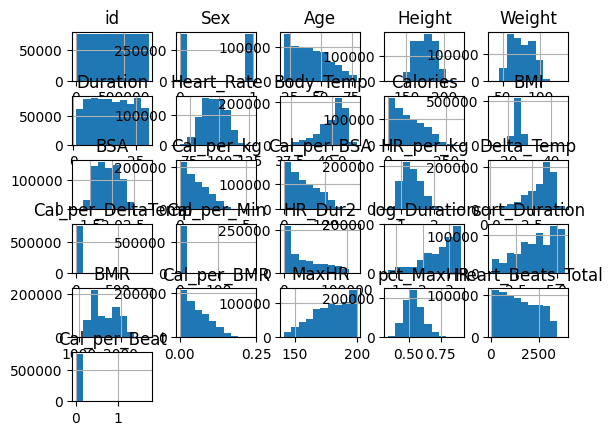

In [29]:
df_train.hist()
plt.show()